In [13]:
%matplotlib inline

In [14]:
from skimage.io import imread, imsave, imshow
from scipy.signal import convolve2d
import numpy as np

In [15]:
sigma = 0.66

In [16]:
def gauss(sigma, x, y):
   sigma_sq =  sigma ** 2
   return np.exp((-x**2-y**2)/(2*sigma_sq))/(2*np.pi*sigma_sq)

In [17]:
def gauss_kernel_size(gauss):
    k = round(sigma * 3)
    size = 2 * k + 1
    return size


In [18]:
def gauss_kernel(sigma):
    k = round(sigma * 3)
    size = 2 * k + 1
    arr1d = [(i, j) for j in range(k, -k - 1, -1) for i in range(-k, k + 1)]
    gauss1d = [gauss(sigma, el[0], el[1]) for el in arr1d]
    s = sum(gauss1d)
    gauss1d = [el / s for el in gauss1d]
    kernel = np.array(gauss1d).reshape((size, size))
    return kernel

In [19]:
kernel = gauss_kernel(sigma)

In [20]:
size = gauss_kernel_size(gauss)

In [21]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')

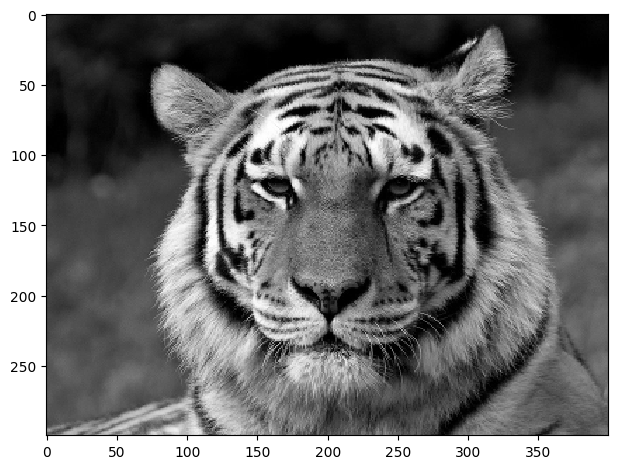

In [22]:
imshow(img)

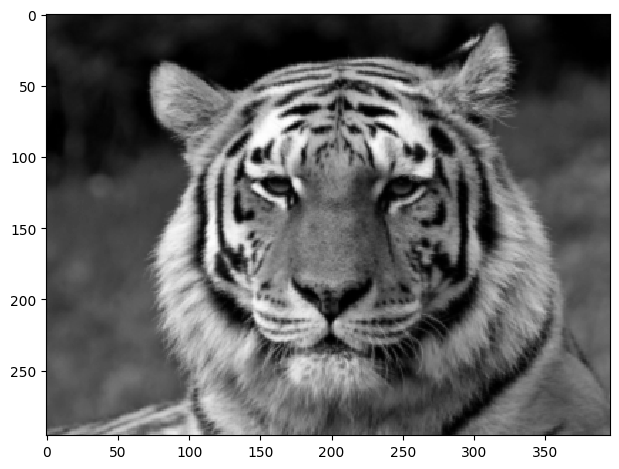

In [23]:
kernel = gauss_kernel(sigma)
img = convolve2d(img.astype("float"), kernel, mode='valid')
img = np.clip(img, 0, 255).astype('uint8')
imshow(img)